### Importing libraries

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

### Exploring dataset 1: HR_comma_sep

In [2]:
hr = pd.read_csv("../data/HR_comma_sep.csv")

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#there is no missing values
#only 2 non numerical columns
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#numercial columns description
#the last 3 columns are dummy variables
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [7]:
hr["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [8]:
hr["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

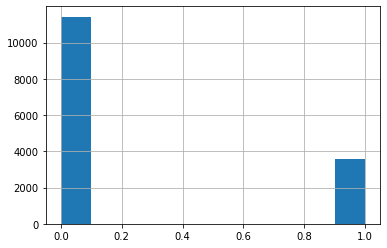

In [9]:
#the "left" is what we want to predict. In this dataset, data is unbalanced
hr["left"].hist()

### Data preprocessing

In [10]:
hr["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

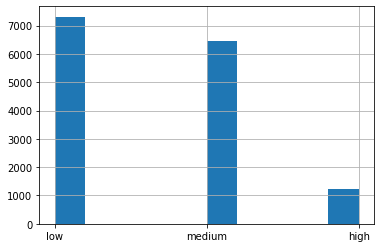

In [11]:
hr["salary"].hist()

In [12]:
hr["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

#### Dummifying "department" and "salary"

In [13]:
hr_final = pd.get_dummies(hr, columns=["sales"], prefix=['department'])

In [14]:
hr_final = pd.get_dummies(hr_final, columns=["salary"], prefix=['salary'])

In [15]:
hr_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_IT             14999 non-null uint8
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_high               14999 non-null 

### separating dataset into train and test

In [16]:
X = hr_final.drop(columns="left")
y = hr_final["left"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
#bulding several random states, to get better accuracy later
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=13)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=8)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=9)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2, random_state=2)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y, test_size=0.2, random_state=27)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X, y, test_size=0.2, random_state=171)
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X, y, test_size=0.2, random_state=500)
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X, y, test_size=0.2, random_state=17)

### performing random forest classifier 

In [19]:
pipeline_rfc = Pipeline([
        ("standard_scal", StandardScaler()),
        ("rfc", RandomForestClassifier(random_state=1))
        ])

In [20]:
pipeline_rfc.fit(X_train, y_train)
y_pred = pipeline_rfc.predict(X_test)

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.9906666666666667

In [22]:
metrics.recall_score(y_test, y_pred, average='micro')

0.9906666666666667

In [23]:
#trying with all the different random states
pipeline_rfc.fit(X_train_1, y_train_1)
y_pred_1 = pipeline_rfc.predict(X_test_1)
ac_1 = metrics.accuracy_score(y_test_1, y_pred_1)
print('1:', ac_1)

pipeline_rfc.fit(X_train_2, y_train_2)
y_pred_2 = pipeline_rfc.predict(X_test_2)
ac_2 = metrics.accuracy_score(y_test_2, y_pred_2)
print('2:', ac_2)

pipeline_rfc.fit(X_train_3, y_train_3)
y_pred_3 = pipeline_rfc.predict(X_test_3)
ac_3 = metrics.accuracy_score(y_test_3, y_pred_3)
print('3:', ac_3)

pipeline_rfc.fit(X_train_4, y_train_4)
y_pred_4 = pipeline_rfc.predict(X_test_4)
ac_4 = metrics.accuracy_score(y_test_4, y_pred_4)
print('4:', ac_4)

pipeline_rfc.fit(X_train_5, y_train_5)
y_pred_5 = pipeline_rfc.predict(X_test_5)
ac_5 = metrics.accuracy_score(y_test_5, y_pred_5)
print('5:', ac_5)

pipeline_rfc.fit(X_train_6, y_train_6)
y_pred_6 = pipeline_rfc.predict(X_test_6)
ac_6 = metrics.accuracy_score(y_test_6, y_pred_6)
print('6:', ac_6)

pipeline_rfc.fit(X_train_7, y_train_7)
y_pred_7 = pipeline_rfc.predict(X_test_7)
ac_7 = metrics.accuracy_score(y_test_7, y_pred_7)
print('7:', ac_7)

pipeline_rfc.fit(X_train_8, y_train_8)
y_pred_8 = pipeline_rfc.predict(X_test_8)
ac_8 = metrics.accuracy_score(y_test_8, y_pred_8)
print('8:', ac_8)

print('mean: ', np.array([ac_1, ac_2, ac_3, ac_4, ac_5, ac_6, ac_7, ac_8]).mean())

1: 0.9933333333333333
2: 0.99
3: 0.9926666666666667
4: 0.99
5: 0.9946666666666667
6: 0.9916666666666667
7: 0.992
8: 0.992
mean:  0.9920416666666667


In [80]:
#random forrest probability:
predictions = pipeline_rfc.predict_proba(X_test)
print(predictions)

[[1.   0.  ]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.96 0.04]
 [0.95 0.05]
 [1.   0.  ]]


In [79]:
y_pred_train = pipeline_rfc.predict(X_train)
metrics.accuracy_score(y_train, y_pred_train)

1.0

In [47]:
#checking effects of max depth in the model
K = range(2, 20)
ac = []
for k in K:
        pipeline_rfc = Pipeline([
        ("standard_scal", StandardScaler()),
        ("rfc", RandomForestClassifier(max_depth=k,random_state=1))
        ])
        pipeline_rfc.fit(X_train, y_train)
        y_pred = pipeline_rfc.predict(X_test)
        ac.append(metrics.accuracy_score(y_test, y_pred))
        print(str(k), " --> ", str(metrics.accuracy_score(y_test, y_pred)))

2  -->  0.8756666666666667
3  -->  0.915
4  -->  0.9166666666666666
5  -->  0.9173333333333333
6  -->  0.965
7  -->  0.975
8  -->  0.9753333333333334
9  -->  0.9766666666666667
10  -->  0.9786666666666667
11  -->  0.9793333333333333
12  -->  0.98
13  -->  0.9816666666666667
14  -->  0.9853333333333333
15  -->  0.9876666666666667
16  -->  0.99
17  -->  0.991
18  -->  0.99
19  -->  0.991


### Performing KNN

In [34]:
pipeline_knn = Pipeline([
        ("standard_scal", StandardScaler()),
        ("pca", PCA()),
        ("knn", KNN())
        ])

In [35]:
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

metrics.accuracy_score(y_test, y_pred_knn)

0.938

In [36]:
#optimizing parameters
param_grid = {
    "standard_scal__with_std":[True, False],
    "pca__n_components": [0.5, 0.8, 0.9, 0.95],
    "neigh__n_neighbors": range(1, 150),
    "neigh__weights": ['uniform', 'distance'],
    "neigh__p": [1,2]
}

In [37]:
full_search = RandomizedSearchCV(pipeline_knn,
                                   param_grid,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=1)

In [38]:
full_search.fit(X_train, y_train)
y_pred_knn_grid = full_search.predict(X_test)
metrics.accuracy_score(y_test, y_pred_knn_grid)

ValueError: Invalid parameter neigh for estimator Pipeline(steps=[('standard_scal', StandardScaler()), ('pca', PCA()),
                ('knn', KNeighborsClassifier())]). Check the list of available parameters with `estimator.get_params().keys()`.

### check correlation between each column and the Y ("left")

In [28]:
for i in hr_final:
    print (hr_final["left"].corr(hr_final[i]))
    

-0.3883749834241141
0.00656712044753405
0.023787185071774148
0.07128717878330114
0.14482217493938584
-0.1546216337051351
0.9999999999999999
-0.0617881065792008
-0.010924827320322593
-0.04659565116671585
0.015201150667721366
0.028248748115931813
-0.04603539070568169
-0.0008593040436756065
-0.011029152078132902
0.009923407033960724
0.01070011801287153
0.020076104934356465
-0.12092946375604423
0.13472197414242135
-0.06883296808670479


In [29]:
hr_final.to_csv("../data/hr_final.csv", index = False)

### check accuracy lost without column "satisfaction level"

In [39]:
hr_no_satisf = hr_final.drop(columns="satisfaction_level")

In [40]:
X = hr_no_satisf.drop(columns="left")
y = hr_no_satisf["left"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [42]:
pipeline_rfc.fit(X_train, y_train)
y_pred = pipeline_rfc.predict(X_test)

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.9833333333333333

### check accuracy lost without column "last evaluation"

In [45]:
hr_no_satisf_evaluation = hr_final.drop(columns=["satisfaction_level","last_evaluation"])

X = hr_no_satisf_evaluation.drop(columns="left")
y = hr_no_satisf_evaluation["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pipeline_rfc.fit(X_train, y_train)
y_pred = pipeline_rfc.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.971